In [1]:
# import packages 
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
from featurewiz import featurewiz
np.random.seed(1234)

Imported 0.2.04 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



In [2]:
data = pd.read_csv(r"C:\Users\Lenovo\Desktop\Brunel MPhil\Python Data\Combined Indicator Data.csv")

In [3]:
data = data.dropna()

In [4]:
display(data.isna().sum())

Unnamed: 0           0
PCR                  0
CS Fear Barometer    0
Bl. Sent. H/L        0
Bl. 52 Week H/L      0
AD. Dec Ratio        0
VIX                  0
Close                0
dtype: int64

In [5]:
data = data.rename(columns = {"Unnamed: 0":"Date"})
data

,Date,PCR,CS Fear Barometer,Bl. Sent. H/L,Bl. 52 Week H/L,AD. Dec Ratio,VIX,Close
0,30-11-2022,1.32,15.31,0.48,-26,461,20.58,4080.1066
1,29-11-2022,1.60,14.06,0.32,-190,62,21.89,3957.6259
2,28-11-2022,1.56,14.38,0.36,-147,-429,22.21,3963.9419
3,25-11-2022,1.57,14.90,0.57,59,199,20.50,4026.1155
4,23-11-2022,1.49,14.68,0.47,-30,214,20.42,4027.2622
...,...,...,...,...,...,...,...,...
1970,13-01-2015,1.58,33.51,0.46,-60,-149,16.96,2023.0292
1971,12-01-2015,2.39,34.50,0.26,-331,407,17.23,2028.2638
1972,09-01-2015,2.04,34.68,0.20,-511,364,18.55,2044.8099
1973,08-01-2015,1.71,32.74,0.23,-416,-347,17.29,2062.1436


In [6]:
data = data.loc[::-1].reset_index(drop=True)
data.tail()

,Date,PCR,CS Fear Barometer,Bl. Sent. H/L,Bl. 52 Week H/L,AD. Dec Ratio,VIX,Close
1970,23-11-2022,1.49,14.68,0.47,-30,214,20.42,4027.2622
1971,25-11-2022,1.57,14.90,0.57,59,199,20.50,4026.1155
1972,28-11-2022,1.56,14.38,0.36,-147,-429,22.21,3963.9419
1973,29-11-2022,1.60,14.06,0.32,-190,62,21.89,3957.6259
1974,30-11-2022,1.32,15.31,0.48,-26,461,20.58,4080.1066


In [7]:
data ['% Change'] = data['Close'].pct_change()*100
data

,Date,PCR,CS Fear Barometer,Bl. Sent. H/L,Bl. 52 Week H/L,AD. Dec Ratio,VIX,Close,% Change
0,07-01-2015,1.59,33.60,0.35,-164,313,16.85,2025.9011,NaN
1,08-01-2015,1.71,32.74,0.23,-416,-347,17.29,2062.1436,1.788957
2,09-01-2015,2.04,34.68,0.20,-511,364,18.55,2044.8099,-0.840567
3,12-01-2015,2.39,34.50,0.26,-331,407,17.23,2028.2638,-0.809175
4,13-01-2015,1.58,33.51,0.46,-60,-149,16.96,2023.0292,-0.258083
...,...,...,...,...,...,...,...,...,...
1970,23-11-2022,1.49,14.68,0.47,-30,214,20.42,4027.2622,0.591566
1971,25-11-2022,1.57,14.90,0.57,59,199,20.50,4026.1155,-0.028473
1972,28-11-2022,1.56,14.38,0.36,-147,-429,22.21,3963.9419,-1.544258
1973,29-11-2022,1.60,14.06,0.32,-190,62,21.89,3957.6259,-0.159336


In [8]:
data = data.set_index(pd.DatetimeIndex(data['Date'].values))

In [9]:
df = data.dropna()
df

,Date,PCR,CS Fear Barometer,Bl. Sent. H/L,Bl. 52 Week H/L,AD. Dec Ratio,VIX,Close,% Change
2015-08-01,08-01-2015,1.71,32.74,0.23,-416,-347,17.29,2062.1436,1.788957
2015-09-01,09-01-2015,2.04,34.68,0.20,-511,364,18.55,2044.8099,-0.840567
2015-12-01,12-01-2015,2.39,34.50,0.26,-331,407,17.23,2028.2638,-0.809175
2015-01-13,13-01-2015,1.58,33.51,0.46,-60,-149,16.96,2023.0292,-0.258083
2015-01-14,14-01-2015,2.00,29.92,0.38,-164,350,15.34,2011.2729,-0.581124
...,...,...,...,...,...,...,...,...,...
2022-11-23,23-11-2022,1.49,14.68,0.47,-30,214,20.42,4027.2622,0.591566
2022-11-25,25-11-2022,1.57,14.90,0.57,59,199,20.50,4026.1155,-0.028473
2022-11-28,28-11-2022,1.56,14.38,0.36,-147,-429,22.21,3963.9419,-1.544258
2022-11-29,29-11-2022,1.60,14.06,0.32,-190,62,21.89,3957.6259,-0.159336


In [10]:
df['PCR'] = df['PCR'].shift(1)  
df

,Date,PCR,CS Fear Barometer,Bl. Sent. H/L,Bl. 52 Week H/L,AD. Dec Ratio,VIX,Close,% Change
2015-08-01,08-01-2015,NaN,32.74,0.23,-416,-347,17.29,2062.1436,1.788957
2015-09-01,09-01-2015,1.71,34.68,0.20,-511,364,18.55,2044.8099,-0.840567
2015-12-01,12-01-2015,2.04,34.50,0.26,-331,407,17.23,2028.2638,-0.809175
2015-01-13,13-01-2015,2.39,33.51,0.46,-60,-149,16.96,2023.0292,-0.258083
2015-01-14,14-01-2015,1.58,29.92,0.38,-164,350,15.34,2011.2729,-0.581124
...,...,...,...,...,...,...,...,...,...
2022-11-23,23-11-2022,1.38,14.68,0.47,-30,214,20.42,4027.2622,0.591566
2022-11-25,25-11-2022,1.49,14.90,0.57,59,199,20.50,4026.1155,-0.028473
2022-11-28,28-11-2022,1.57,14.38,0.36,-147,-429,22.21,3963.9419,-1.544258
2022-11-29,29-11-2022,1.56,14.06,0.32,-190,62,21.89,3957.6259,-0.159336


In [11]:
df['CS Fear Barometer'] = df['CS Fear Barometer'].shift(1)
df['Bl. Sent. H/L'] = df['Bl. Sent. H/L'].shift(1)
df['Bl. 52 Week H/L'] = df['Bl. 52 Week H/L'].shift(1)
df['AD. Dec Ratio'] = df['AD. Dec Ratio'].shift(1)
df['VIX'] = df['VIX'].shift(1)
df

,Date,PCR,CS Fear Barometer,Bl. Sent. H/L,Bl. 52 Week H/L,AD. Dec Ratio,VIX,Close,% Change
2015-08-01,08-01-2015,NaN,NaN,NaN,NaN,NaN,NaN,2062.1436,1.788957
2015-09-01,09-01-2015,1.71,32.74,0.23,-416.0,-347.0,17.29,2044.8099,-0.840567
2015-12-01,12-01-2015,2.04,34.68,0.20,-511.0,364.0,18.55,2028.2638,-0.809175
2015-01-13,13-01-2015,2.39,34.50,0.26,-331.0,407.0,17.23,2023.0292,-0.258083
2015-01-14,14-01-2015,1.58,33.51,0.46,-60.0,-149.0,16.96,2011.2729,-0.581124
...,...,...,...,...,...,...,...,...,...
2022-11-23,23-11-2022,1.38,13.80,0.39,-140.0,397.0,20.35,4027.2622,0.591566
2022-11-25,25-11-2022,1.49,14.68,0.47,-30.0,214.0,20.42,4026.1155,-0.028473
2022-11-28,28-11-2022,1.57,14.90,0.57,59.0,199.0,20.50,3963.9419,-1.544258
2022-11-29,29-11-2022,1.56,14.38,0.36,-147.0,-429.0,22.21,3957.6259,-0.159336


In [12]:
df = df.dropna()
df

,Date,PCR,CS Fear Barometer,Bl. Sent. H/L,Bl. 52 Week H/L,AD. Dec Ratio,VIX,Close,% Change
2015-09-01,09-01-2015,1.71,32.74,0.23,-416.0,-347.0,17.29,2044.8099,-0.840567
2015-12-01,12-01-2015,2.04,34.68,0.20,-511.0,364.0,18.55,2028.2638,-0.809175
2015-01-13,13-01-2015,2.39,34.50,0.26,-331.0,407.0,17.23,2023.0292,-0.258083
2015-01-14,14-01-2015,1.58,33.51,0.46,-60.0,-149.0,16.96,2011.2729,-0.581124
2015-01-15,15-01-2015,2.00,29.92,0.38,-164.0,350.0,15.34,1992.6703,-0.924917
...,...,...,...,...,...,...,...,...,...
2022-11-23,23-11-2022,1.38,13.80,0.39,-140.0,397.0,20.35,4027.2622,0.591566
2022-11-25,25-11-2022,1.49,14.68,0.47,-30.0,214.0,20.42,4026.1155,-0.028473
2022-11-28,28-11-2022,1.57,14.90,0.57,59.0,199.0,20.50,3963.9419,-1.544258
2022-11-29,29-11-2022,1.56,14.38,0.36,-147.0,-429.0,22.21,3957.6259,-0.159336


In [13]:
df['Direction'] = [1 if i>0 else 0 for i in df['% Change']]
df

,Date,PCR,CS Fear Barometer,Bl. Sent. H/L,Bl. 52 Week H/L,AD. Dec Ratio,VIX,Close,% Change,Direction
2015-09-01,09-01-2015,1.71,32.74,0.23,-416.0,-347.0,17.29,2044.8099,-0.840567,0
2015-12-01,12-01-2015,2.04,34.68,0.20,-511.0,364.0,18.55,2028.2638,-0.809175,0
2015-01-13,13-01-2015,2.39,34.50,0.26,-331.0,407.0,17.23,2023.0292,-0.258083,0
2015-01-14,14-01-2015,1.58,33.51,0.46,-60.0,-149.0,16.96,2011.2729,-0.581124,0
2015-01-15,15-01-2015,2.00,29.92,0.38,-164.0,350.0,15.34,1992.6703,-0.924917,0
...,...,...,...,...,...,...,...,...,...,...
2022-11-23,23-11-2022,1.38,13.80,0.39,-140.0,397.0,20.35,4027.2622,0.591566,1
2022-11-25,25-11-2022,1.49,14.68,0.47,-30.0,214.0,20.42,4026.1155,-0.028473,0
2022-11-28,28-11-2022,1.57,14.90,0.57,59.0,199.0,20.50,3963.9419,-1.544258,0
2022-11-29,29-11-2022,1.56,14.38,0.36,-147.0,-429.0,22.21,3957.6259,-0.159336,0


In [14]:
df['Direction'] = df['Direction'].shift(-1, fill_value=0)
df

,Date,PCR,CS Fear Barometer,Bl. Sent. H/L,Bl. 52 Week H/L,AD. Dec Ratio,VIX,Close,% Change,Direction
2015-09-01,09-01-2015,1.71,32.74,0.23,-416.0,-347.0,17.29,2044.8099,-0.840567,0
2015-12-01,12-01-2015,2.04,34.68,0.20,-511.0,364.0,18.55,2028.2638,-0.809175,0
2015-01-13,13-01-2015,2.39,34.50,0.26,-331.0,407.0,17.23,2023.0292,-0.258083,0
2015-01-14,14-01-2015,1.58,33.51,0.46,-60.0,-149.0,16.96,2011.2729,-0.581124,0
2015-01-15,15-01-2015,2.00,29.92,0.38,-164.0,350.0,15.34,1992.6703,-0.924917,1
...,...,...,...,...,...,...,...,...,...,...
2022-11-23,23-11-2022,1.38,13.80,0.39,-140.0,397.0,20.35,4027.2622,0.591566,0
2022-11-25,25-11-2022,1.49,14.68,0.47,-30.0,214.0,20.42,4026.1155,-0.028473,0
2022-11-28,28-11-2022,1.57,14.90,0.57,59.0,199.0,20.50,3963.9419,-1.544258,0
2022-11-29,29-11-2022,1.56,14.38,0.36,-147.0,-429.0,22.21,3957.6259,-0.159336,1


In [15]:
df.isnull().sum()

Date                 0
PCR                  0
CS Fear Barometer    0
Bl. Sent. H/L        0
Bl. 52 Week H/L      0
AD. Dec Ratio        0
VIX                  0
Close                0
% Change             0
Direction            0
dtype: int64

In [16]:
df = df.drop(columns ='Close')

In [17]:
df_correlations = df.corr(method='pearson')

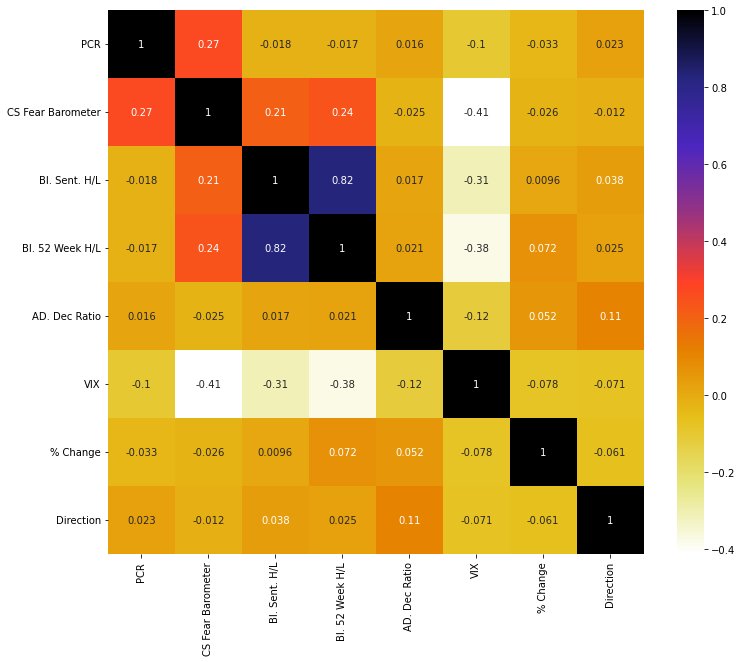

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.heatmap(df_correlations, annot= True, cmap=plt.cm.CMRmap_r)
plt.show()

In [19]:
# Test variables set 1 
X = df.copy()
X = X.drop(columns =['Direction','Date'])
y = df['Direction']

In [20]:
X_scaled =  StandardScaler().fit_transform(X) 

In [21]:
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size = 0.3, stratify=y, random_state=1)

In [22]:
classifier = RandomForestClassifier()
 
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [23]:
# make prediction 
preds = classifier.predict(X_valid) 
# check performance
accuracy_score(preds,y_valid) 

0.5743243243243243

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 1 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
    Loaded train data. Shape = (1973, 9)
    Some column names had special characters which were removed...
#### Single_Label Binary_Classification problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  #

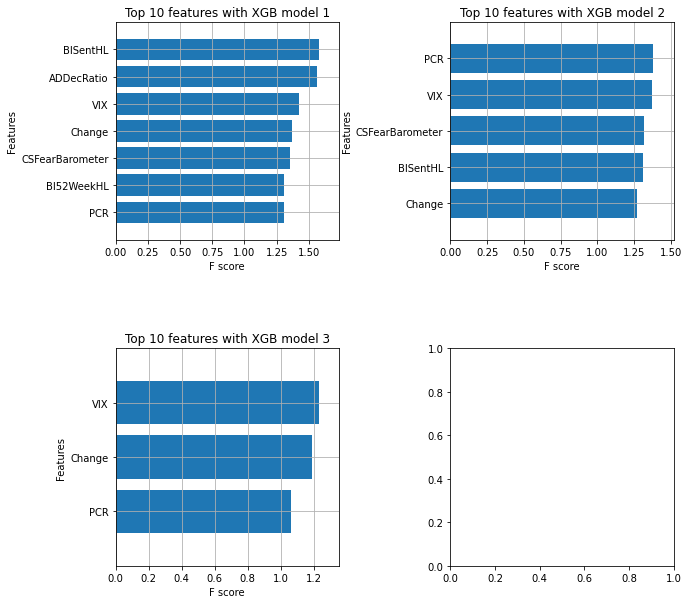

    Completed XGBoost feature selection in 0 seconds
    Alert: No ID variables ['Date'] are included in selected features
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 4 important features:
['BlSentHL', 'ADDecRatio', 'VIX', 'PCR']
Total Time taken for featurewiz selection = 1 seconds
Output contains a list of 4 important features and a train dataframe


In [24]:
# automatic feature selection by using featurewiz package
target = 'Direction'
 
features, train = featurewiz(df, target, corr_limit=1, verbose=2, sep=",", header=0, test_data="", feature_engg="", category_encoders="")

In [25]:
print(features)
print (','.join(map(str,features)))

['Bl. Sent. H/L', 'AD. Dec Ratio', 'VIX', 'PCR']
Bl. Sent. H/L,AD. Dec Ratio,VIX,PCR


In [26]:
#split data into feature and target
X_new = train.drop(['Direction'],axis=1)
 
y = train.Direction.values 

In [27]:
X_new

,Bl. Sent. H/L,AD. Dec Ratio,VIX,PCR
2015-09-01,0.23,-347.0,17.29,1.71
2015-12-01,0.20,364.0,18.55,2.04
2015-01-13,0.26,407.0,17.23,2.39
2015-01-14,0.46,-149.0,16.96,1.58
2015-01-15,0.38,350.0,15.34,2.00
...,...,...,...,...
2022-11-23,0.39,397.0,20.35,1.38
2022-11-25,0.47,214.0,20.42,1.49
2022-11-28,0.57,199.0,20.50,1.57
2022-11-29,0.36,-429.0,22.21,1.56


In [28]:
# preprocessing the features 
X_scaled =  StandardScaler().fit_transform(X_new)

In [29]:
X_scaled

array([[-1.15316205, -1.52111204, -0.18437535, -0.07027957],
       [-1.2711616 ,  1.39860611, -0.02629083,  0.84287798],
       [-1.0351625 ,  1.57518541, -0.19190319,  1.8113784 ],
       ...,
       [ 0.18416622,  0.72103439,  0.2183638 , -0.45767974],
       [-0.64183065, -1.85784466,  0.43290708, -0.48535118],
       [-0.79916339,  0.15844453,  0.39275863, -0.37466542]])

In [30]:
#split data into train and validate 
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled,y,test_size = 0.3,stratify=y, random_state=1)

In [31]:
# create and train classifier 
classifier = RandomForestClassifier()
 
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [32]:
# make prediction 
preds = classifier.predict(X_valid) 
# check performance
accuracy_score(preds,y_valid)

0.5929054054054054

In [33]:
#Run with Logistic Regression - Scaled 

X_train, X_valid, y_train, y_valid = train_test_split(X_scaled,y,test_size = 0.2, random_state=1, shuffle = False)
log_reg = LogisticRegression(random_state=0, tol=1e-8, max_iter=5000, class_weight = 'balanced').fit(X_train, y_train)
log_reg.predict(X_train)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [34]:
log_reg.score(X_train, y_train)

0.5215462610899874

In [35]:
log_reg.score(X_valid, y_valid)

0.5443037974683544

In [36]:
#Run with Logistic Regression - UnScaled 

X_train, X_valid, y_train, y_valid = train_test_split(X_new,y,test_size = 0.2, random_state=1, shuffle = False)
log_reg = LogisticRegression(random_state=0, tol=1e-8, max_iter=5000, class_weight = 'balanced').fit(X_train, y_train)
log_reg.predict(X_train)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [37]:
log_reg.score(X_train, y_train)

0.5247148288973384

In [38]:
log_reg.score(X_valid, y_valid)

0.549367088607595

In [39]:
#Run with Logistic Regression - UnScaled - increasing test size - 0.3

X_train, X_valid, y_train, y_valid = train_test_split(X_new,y,test_size = 0.3, random_state=1, shuffle = False)
log_reg = LogisticRegression(random_state=0, tol=1e-8, max_iter=5000, class_weight = 'balanced').fit(X_train, y_train)
log_reg.predict(X_train)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [40]:
log_reg.score(X_train, y_train)

0.5220854453294714

In [41]:
log_reg.score(X_valid, y_valid)

0.5168918918918919

In [42]:
#Run with Logistic Regression - UnScaled - increasing test size - 0.4
X_train, X_valid, y_train, y_valid = train_test_split(X_new,y,test_size = 0.4, random_state=1, shuffle = False)
log_reg = LogisticRegression(random_state=0, tol=1e-8, max_iter=5000, class_weight = 'balanced').fit(X_train, y_train)
log_reg.predict(X_train)

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [43]:
log_reg.score(X_train, y_train)

0.5426880811496196

In [44]:
log_reg.score(X_valid, y_valid)

0.4936708860759494

In [45]:
df

,Date,PCR,CS Fear Barometer,Bl. Sent. H/L,Bl. 52 Week H/L,AD. Dec Ratio,VIX,% Change,Direction
2015-09-01,09-01-2015,1.71,32.74,0.23,-416.0,-347.0,17.29,-0.840567,0
2015-12-01,12-01-2015,2.04,34.68,0.20,-511.0,364.0,18.55,-0.809175,0
2015-01-13,13-01-2015,2.39,34.50,0.26,-331.0,407.0,17.23,-0.258083,0
2015-01-14,14-01-2015,1.58,33.51,0.46,-60.0,-149.0,16.96,-0.581124,0
2015-01-15,15-01-2015,2.00,29.92,0.38,-164.0,350.0,15.34,-0.924917,1
...,...,...,...,...,...,...,...,...,...
2022-11-23,23-11-2022,1.38,13.80,0.39,-140.0,397.0,20.35,0.591566,0
2022-11-25,25-11-2022,1.49,14.68,0.47,-30.0,214.0,20.42,-0.028473,0
2022-11-28,28-11-2022,1.57,14.90,0.57,59.0,199.0,20.50,-1.544258,0
2022-11-29,29-11-2022,1.56,14.38,0.36,-147.0,-429.0,22.21,-0.159336,1


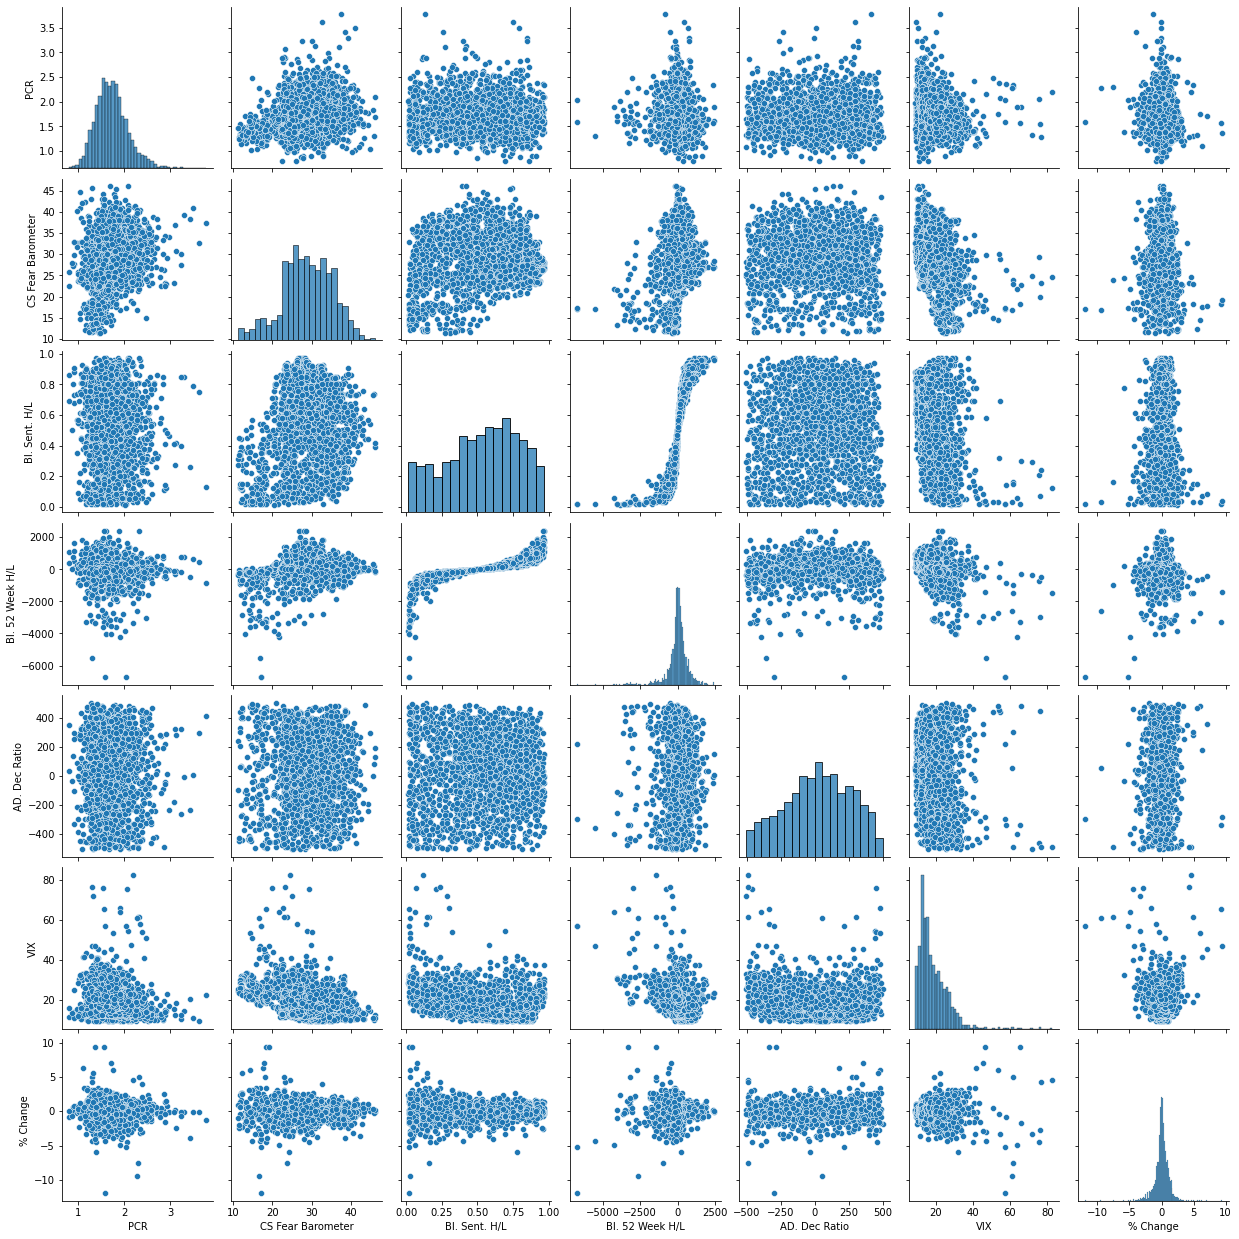

In [46]:
sns.pairplot(df[['PCR','CS Fear Barometer','Bl. Sent. H/L','Bl. 52 Week H/L','AD. Dec Ratio','VIX','% Change']])

In [47]:
# Creating Pipeline to select the best method
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.3, random_state=1, shuffle = False)

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
#from sklearn.tree import DecisionTreeClassifer
#from sklearn.ensemble import RandomForstClassifer 
#from sklearn.externals import joblib

In [81]:
pipeline_lr = Pipeline([('scalar1', StandardScaler()),
                        ('pca1', PCA(n_components=2)),
                        ('lr_classifier',LogisticRegression(random_state=0))])
                        

In [82]:
#pipeline_lr = Pipeline([('scalar2', StandardScaler()),
                       # ('pca2', PCA(n_components=2)),
                       # ('dt_classifier',DecisionTreeClassifier())])

In [83]:
#pipeline_lr = Pipeline([('scalar3', StandardScaler()),
    #                    ('pca3', PCA(n_components=2)),
    #                    ('rf_classifier',RandomForstClassifer())])

In [84]:
best_accuracy = 0.0
best_classifier = 0
best_pipeline=""

In [85]:
pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('scalar1', StandardScaler()), ('pca1', PCA(n_components=2)),
                ('lr_classifier', LogisticRegression(random_state=0))])

In [86]:
pipeline_lr.score(X_test, y_test)

0.6199324324324325

In [87]:
pipeline_lr.score(X_train, y_train)

0.5488776249094859

In [88]:
#Hyper-parameter tuning with GridSearch CV 
from sklearn.model_selection import GridSearchCV

In [122]:
pipe = Pipeline([("classifier", RandomForestClassifier())])

In [136]:
a = np.logspace(0,4,10)
b = np.geomspace(1e-5,1e5 , num=20)

grid_param = [{"classifier": [LogisticRegression()],
              "classifier__penalty":['l2','l1'],
              "classifier__C": a
             },
             {"classifier": [LogisticRegression()],
              "classifier__penalty":['l2'],
              "classifier__C": a,
               "classifier__solver":['newton-cg','saga','sag','liblinear']
              }] 

In [137]:
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0, n_jobs=-1)
best_model = gridsearch.fit(X_train,y_train)

In [138]:
best_model.score(X_test,y_test)

0.5608108108108109

In [139]:
print(best_model.best_estimator_)

Pipeline(steps=[('classifier', LogisticRegression())])
